In [1]:
from __future__ import print_function, division
import os
import torch
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from tqdm import tqdm
import torch.nn as nn
import torch.nn.functional as F

In [2]:
#The Path to the Directory where the Dataset is saved
_trainDir = "Datasets/Tiny-ImageNet/train/"
_valDir = "Datasets/Tiny-ImageNet/val/"

In [10]:
#Using the Dataset Builder from Pytorch
class TinyImageNet(Dataset):
    train_x = []
    train_y = []
    classes = {}
    
    def __init__(self, path, transform=True):
        # Open and load text file including the whole training data
        self.transform = transform
        for x,y in tqdm(enumerate(os.listdir(path))):
            print (x,y)
            if "DS_Store" in y:
                continue
            self.classes[x] = y
            curr_path = os.path.join(os.path.join(path,y),"images")
            for q,w in tqdm(enumerate(os.listdir(curr_path))):
                self.train_x.append(os.path.join(curr_path,w))
                self.train_y.append(np.float32(x))
        
    def __len__(self):
        return len(self.train_x)

    def __getitem__(self, index):
        img = io.imread(self.train_x[index])
        # Convert image and label to torch tensors
        img = torch.from_numpy(np.asarray(img))
        label = torch.from_numpy(np.asarray(self.train_y[index]).reshape([1,1]))
        return img, label

In [11]:
trainingDataset = TinyImageNet(_trainDir)

0it [00:00, ?it/s]
0it [00:00, ?it/s]
500it [00:00, 134303.68it/s]
0it [00:00, ?it/s]
500it [00:00, 94949.61it/s]
0it [00:00, ?it/s]
500it [00:00, 102565.27it/s]
0it [00:00, ?it/s]
500it [00:00, 64062.56it/s]
0it [00:00, ?it/s]
500it [00:00, 136284.90it/s]
0it [00:00, ?it/s]
6it [00:00, 58.66it/s]8it/s]
0it [00:00, ?it/s]
500it [00:00, 39793.40it/s]
0it [00:00, ?it/s]
500it [00:00, 51895.57it/s]
0it [00:00, ?it/s]
500it [00:00, 66559.35it/s]

0 n02795169
1 n02769748
2 n07920052
3 n02917067
4 n01629819
5 n02058221
6 n02793495
7 n04251144
8 n02814533


9it [00:00, 44.18it/s]
0it [00:00, ?it/s]
500it [00:00, 125630.62it/s]
0it [00:00, ?it/s]
500it [00:00, 112255.22it/s]
0it [00:00, ?it/s]
500it [00:00, 109821.53it/s]
0it [00:00, ?it/s]
500it [00:00, 130924.71it/s]
0it [00:00, ?it/s]
14it [00:00, 44.98it/s]t/s]
0it [00:00, ?it/s]
500it [00:00, 153502.56it/s]
0it [00:00, ?it/s]
500it [00:00, 111260.65it/s]
0it [00:00, ?it/s]
500it [00:00, 61280.81it/s]
0it [00:00, ?it/s]
500it [00:00, 76555.16it/s]
0it [00:00, ?it/s]

9 n02837789
10 n01770393
11 n01910747
12 n03649909
13 n02124075
14 n01774750
15 n06596364
16 n03838899
17 n02480495
18 n09256479



19it [00:00, 44.40it/s]t/s]
0it [00:00, ?it/s]
500it [00:00, 106719.86it/s]
0it [00:00, ?it/s]
500it [00:00, 70305.81it/s]
0it [00:00, ?it/s]
500it [00:00, 210959.86it/s]
0it [00:00, ?it/s]
500it [00:00, 78813.63it/s]
0it [00:00, ?it/s]
24it [00:00, 45.31it/s]it/s]
0it [00:00, ?it/s]
500it [00:00, 131236.05it/s]
0it [00:00, ?it/s]
500it [00:00, 61934.14it/s]
0it [00:00, ?it/s]
500it [00:00, 79467.68it/s]
0it [00:00, ?it/s]
500it [00:00, 59473.43it/s]
0it [00:00, ?it/s]
500it [00:00, 65737.32it/s]

19 n03085013
20 n01443537
21 n04376876
22 n03404251
23 n03930313
24 n03089624
25 n04371430
26 n04254777
27 n02909870
28 n07614500


29it [00:00, 45.59it/s]
0it [00:00, ?it/s]
500it [00:00, 136648.99it/s]
0it [00:00, ?it/s]
500it [00:00, 68313.37it/s]
0it [00:00, ?it/s]
500it [00:00, 44377.59it/s]
0it [00:00, ?it/s]
500it [00:00, 99184.26it/s]
0it [00:00, ?it/s]
35it [00:00, 46.57it/s]it/s]
0it [00:00, ?it/s]
500it [00:00, 164974.20it/s]
0it [00:00, ?it/s]
500it [00:00, 67606.45it/s]
0it [00:00, ?it/s]
500it [00:00, 87813.08it/s]
0it [00:00, ?it/s]
500it [00:00, 141431.89it/s]

29 n02977058
30 n04259630
31 n07579787
32 n02950826
33 .DS_Store
34 n02279972
35 n03424325
36 n03854065
37 n02403003
38 n01742172



0it [00:00, ?it/s]
40it [00:00, 46.34it/s]it/s]
0it [00:00, ?it/s]
500it [00:00, 81709.34it/s]
0it [00:00, ?it/s]
500it [00:00, 76934.30it/s]
0it [00:00, ?it/s]
500it [00:00, 32181.20it/s]
0it [00:00, ?it/s]
500it [00:00, 79051.30it/s]
0it [00:00, ?it/s]
45it [00:00, 45.62it/s]it/s]
0it [00:00, ?it/s]
500it [00:00, 63346.58it/s]
0it [00:00, ?it/s]
500it [00:00, 86341.64it/s]
0it [00:00, ?it/s]
500it [00:00, 93752.60it/s]


39 n01882714
40 n03977966
41 n02669723
42 n02226429
43 n04366367
44 n02002724
45 n03891332
46 n01768244
47 n02509815
48 n03544143


0it [00:00, ?it/s]
500it [00:00, 59311.95it/s]
0it [00:00, ?it/s]
50it [00:01, 45.79it/s]t/s]
0it [00:00, ?it/s]
500it [00:00, 167772.16it/s]
0it [00:00, ?it/s]
500it [00:00, 84959.97it/s]
0it [00:00, ?it/s]
500it [00:00, 63298.78it/s]
0it [00:00, ?it/s]
500it [00:00, 185687.27it/s]
0it [00:00, ?it/s]
55it [00:01, 44.75it/s]t/s]
0it [00:00, ?it/s]
500it [00:00, 67560.71it/s]
0it [00:00, ?it/s]
500it [00:00, 80905.52it/s]

49 n02321529
50 n02099601
51 n02948072
52 n04456115
53 n02236044
54 n03126707
55 n02074367
56 n03255030



0it [00:00, ?it/s]
500it [00:00, 71992.86it/s]
0it [00:00, ?it/s]
500it [00:00, 106997.55it/s]
0it [00:00, ?it/s]
60it [00:01, 44.62it/s]it/s]
0it [00:00, ?it/s]
500it [00:00, 80591.50it/s]
0it [00:00, ?it/s]
500it [00:00, 74459.51it/s]
0it [00:00, ?it/s]
500it [00:00, 88903.81it/s]
0it [00:00, ?it/s]
500it [00:00, 89591.25it/s]
0it [00:00, ?it/s]
65it [00:01, 44.24it/s]t/s]

57 n01950731
58 n02268443
59 n04501370
60 n03970156
61 n04099969
62 n04023962
63 n02085620
64 n02823428
65 n04265275



0it [00:00, ?it/s]
500it [00:00, 79230.50it/s]
0it [00:00, ?it/s]
500it [00:00, 48425.24it/s]
0it [00:00, ?it/s]
500it [00:00, 76594.30it/s]
0it [00:00, ?it/s]
500it [00:00, 87000.71it/s]
0it [00:00, ?it/s]
70it [00:01, 43.55it/s]t/s]
0it [00:00, ?it/s]
500it [00:00, 84474.02it/s]
0it [00:00, ?it/s]
500it [00:00, 56281.25it/s]
0it [00:00, ?it/s]
500it [00:00, 100241.48it/s]
0it [00:00, ?it/s]


66 n02113799
67 n01784675
68 n03706229
69 n03100240
70 n04532106
71 n02788148
72 n07753592
73 n03983396


500it [00:00, 50632.61it/s]
0it [00:00, ?it/s]
75it [00:01, 43.42it/s]t/s]
0it [00:00, ?it/s]
500it [00:00, 127773.84it/s]
0it [00:00, ?it/s]
500it [00:00, 218909.39it/s]
0it [00:00, ?it/s]
500it [00:00, 122069.38it/s]
0it [00:00, ?it/s]
500it [00:00, 131755.48it/s]
0it [00:00, ?it/s]
500it [00:00, 96656.31it/s]
0it [00:00, ?it/s]
81it [00:01, 44.16it/s]it/s]
0it [00:00, ?it/s]
500it [00:00, 77819.29it/s]
0it [00:00, ?it/s]
500it [00:00, 118852.48it/s]
0it [00:00, ?it/s]
500it [00:00, 65070.34it/s]

74 n04399382
75 n03902125
76 n02814860
77 n03014705
78 n09428293
79 n02481823
80 n04597913
81 n01944390
82 n03355925
83 n07871810
84 n03042490



0it [00:00, ?it/s]
500it [00:00, 115316.84it/s]
0it [00:00, ?it/s]
86it [00:01, 44.11it/s]t/s]
0it [00:00, ?it/s]
500it [00:00, 51943.13it/s]
0it [00:00, ?it/s]
500it [00:00, 99603.51it/s]
0it [00:00, ?it/s]
500it [00:00, 60709.59it/s]
0it [00:00, ?it/s]
500it [00:00, 78654.01it/s]
0it [00:00, ?it/s]
91it [00:02, 43.99it/s]t/s]
0it [00:00, ?it/s]
500it [00:00, 110324.16it/s]
0it [00:00, ?it/s]
500it [00:00, 96314.50it/s]


85 n02190166
86 n04486054
87 n04008634
88 n02906734
89 n02699494
90 n04070727
91 n01855672
92 n09246464
93 n02364673


0it [00:00, ?it/s]
500it [00:00, 146295.92it/s]
0it [00:00, ?it/s]
500it [00:00, 62298.43it/s]
0it [00:00, ?it/s]
96it [00:02, 43.73it/s]it/s]
0it [00:00, ?it/s]
500it [00:00, 96616.24it/s]
0it [00:00, ?it/s]
500it [00:00, 78319.15it/s]
0it [00:00, ?it/s]
500it [00:00, 117784.44it/s]
0it [00:00, ?it/s]
500it [00:00, 97234.42it/s]
0it [00:00, ?it/s]
101it [00:02, 43.95it/s]/s]
0it [00:00, ?it/s]
500it [00:00, 100419.08it/s]
0it [00:00, ?it/s]
500it [00:00, 100059.74it/s]
0it [00:00, ?it/s]

94 n07768694
95 n02883205
96 n04532670
97 n02815834
98 n02165456
99 n04540053
100 n02802426
101 n04356056
102 n03670208
103 n04562935



500it [00:00, 104868.09it/s]
0it [00:00, ?it/s]
500it [00:00, 74295.96it/s]
0it [00:00, ?it/s]
500it [00:00, 103757.77it/s]
0it [00:00, ?it/s]
107it [00:02, 44.39it/s]t/s]
0it [00:00, ?it/s]
500it [00:00, 111836.18it/s]
0it [00:00, ?it/s]
500it [00:00, 72528.17it/s]
0it [00:00, ?it/s]
500it [00:00, 104185.60it/s]
0it [00:00, ?it/s]
500it [00:00, 71234.78it/s]
0it [00:00, ?it/s]
112it [00:02, 44.44it/s]/s]
0it [00:00, ?it/s]
500it [00:00, 88979.25it/s]


104 n01641577
105 n07615774
106 n07734744
107 n03584254
108 n01698640
109 n04507155
110 n02125311
111 n03179701
112 n07873807
113 n04179913


0it [00:00, ?it/s]
500it [00:00, 100222.32it/s]
0it [00:00, ?it/s]
500it [00:00, 55121.48it/s]
0it [00:00, ?it/s]
500it [00:00, 56231.45it/s]
0it [00:00, ?it/s]
117it [00:02, 44.48it/s]t/s]
0it [00:00, ?it/s]
500it [00:00, 166045.29it/s]
0it [00:00, ?it/s]
500it [00:00, 152809.09it/s]
0it [00:00, ?it/s]
500it [00:00, 123303.86it/s]
0it [00:00, ?it/s]
500it [00:00, 65505.29it/s]
0it [00:00, ?it/s]
500it [00:00, 136240.63it/s]
0it [00:00, ?it/s]
123it [00:02, 45.05it/s]/s]
0it [00:00, ?it/s]
500it [00:00, 74914.34it/s]
0it [00:00, ?it/s]
500it [00:00, 57065.36it/s]

114 n04560804
115 n03393912
116 n02841315
117 n02843684
118 n09193705
119 n02437312
120 n04275548
121 n04118538
122 n02099712
123 n07747607
124 n03250847



0it [00:00, ?it/s]
500it [00:00, 91442.92it/s]
0it [00:00, ?it/s]
500it [00:00, 84007.05it/s]
0it [00:00, ?it/s]
500it [00:00, 166335.03it/s]
0it [00:00, ?it/s]
129it [00:02, 45.35it/s]/s]
0it [00:00, ?it/s]
500it [00:00, 99376.96it/s]
0it [00:00, ?it/s]
500it [00:00, 78298.69it/s]
0it [00:00, ?it/s]
500it [00:00, 100722.92it/s]
0it [00:00, ?it/s]
500it [00:00, 55959.87it/s]
0it [00:00, ?it/s]
500it [00:00, 118262.67it/s]
0it [00:00, ?it/s]
135it [00:02, 45.77it/s]t/s]
0it [00:00, ?it/s]
500it [00:00, 121327.86it/s]
0it [00:00, ?it/s]

125 n04133789
126 n02094433
127 n04074963
128 n02129165
129 n03637318
130 n02056570
131 n02410509
132 n03980874
133 n03400231
134 n03814639
135 n03026506
136 n01644900



500it [00:00, 66888.40it/s]
0it [00:00, ?it/s]
500it [00:00, 106568.02it/s]
0it [00:00, ?it/s]
500it [00:00, 95983.89it/s]
0it [00:00, ?it/s]
500it [00:00, 87702.91it/s]
0it [00:00, ?it/s]
141it [00:03, 45.90it/s]/s]
0it [00:00, ?it/s]
500it [00:00, 107524.20it/s]
0it [00:00, ?it/s]
500it [00:00, 128501.96it/s]
0it [00:00, ?it/s]
500it [00:00, 219574.08it/s]
0it [00:00, ?it/s]
500it [00:00, 122848.81it/s]
0it [00:00, ?it/s]
500it [00:00, 81338.56it/s]
0it [00:00, ?it/s]
500it [00:00, 125120.94it/s]

137 n04398044
138 n02666196
139 n03444034
140 n04487081
141 n02486410
142 n02808440
143 n04149813
144 n12267677
145 n03662601
146 n02233338


147it [00:03, 46.04it/s]
0it [00:00, ?it/s]
500it [00:00, 85381.97it/s]
0it [00:00, ?it/s]
500it [00:00, 168784.87it/s]
0it [00:00, ?it/s]
500it [00:00, 74361.82it/s]
0it [00:00, ?it/s]
500it [00:00, 79606.44it/s]
0it [00:00, ?it/s]
500it [00:00, 97828.61it/s]
0it [00:00, ?it/s]
153it [00:03, 46.33it/s]/s]
0it [00:00, ?it/s]
500it [00:00, 92536.38it/s]
0it [00:00, ?it/s]
500it [00:00, 64209.67it/s]
0it [00:00, ?it/s]
500it [00:00, 69146.76it/s]
0it [00:00, ?it/s]
500it [00:00, 78778.11it/s]
0it [00:00, ?it/s]
500it [00:00, 88603.32it/s]
0it [00:00, ?it/s]


147 n07711569
148 n02791270
149 n04465501
150 n03599486
151 n07720875
152 n03447447
153 n03804744
154 n04311004
155 n07695742
156 n07583066
157 n07715103
158 n04328186


159it [00:03, 46.68it/s]/s]
0it [00:00, ?it/s]
500it [00:00, 199197.57it/s]
0it [00:00, ?it/s]
500it [00:00, 101194.36it/s]
0it [00:00, ?it/s]
500it [00:00, 155034.52it/s]
0it [00:00, ?it/s]
500it [00:00, 66667.26it/s]
0it [00:00, ?it/s]
500it [00:00, 96754.42it/s]
0it [00:00, ?it/s]
165it [00:03, 46.72it/s]/s]
0it [00:00, ?it/s]
500it [00:00, 68240.01it/s]
0it [00:00, ?it/s]
500it [00:00, 111160.39it/s]
0it [00:00, ?it/s]
500it [00:00, 203015.68it/s]
0it [00:00, ?it/s]
500it [00:00, 106654.73it/s]

159 n01917289
160 n02106662
161 n02927161
162 n02395406
163 n02231487
164 n02123394
165 n03976657
166 n02423022
167 n03770439
168 n04067472



0it [00:00, ?it/s]
500it [00:00, 97464.89it/s]
0it [00:00, ?it/s]
171it [00:03, 46.86it/s]t/s]
0it [00:00, ?it/s]
500it [00:00, 87170.67it/s]
0it [00:00, ?it/s]
500it [00:00, 204261.42it/s]
0it [00:00, ?it/s]
500it [00:00, 172946.73it/s]
0it [00:00, ?it/s]
500it [00:00, 219896.40it/s]
0it [00:00, ?it/s]
500it [00:00, 155137.74it/s]
0it [00:00, ?it/s]
177it [00:03, 47.18it/s]t/s]
0it [00:00, ?it/s]
500it [00:00, 124882.51it/s]
0it [00:00, ?it/s]
500it [00:00, 66208.43it/s]
0it [00:00, ?it/s]
500it [00:00, 156457.18it/s]

169 n02206856
170 n04285008
171 n03617480
172 n03733131
173 n02415577
174 n04146614
175 n03388043
176 n01945685
177 n02892201
178 n03160309
179 n02281406
180 n02999410



0it [00:00, ?it/s]
500it [00:00, 144591.29it/s]
0it [00:00, ?it/s]
500it [00:00, 143847.45it/s]
0it [00:00, ?it/s]
183it [00:03, 47.36it/s]/s]
0it [00:00, ?it/s]
500it [00:00, 67395.70it/s]
0it [00:00, ?it/s]
500it [00:00, 173734.74it/s]
0it [00:00, ?it/s]
500it [00:00, 57157.12it/s]
0it [00:00, ?it/s]
500it [00:00, 87894.05it/s]
0it [00:00, ?it/s]
500it [00:00, 100524.97it/s]
0it [00:00, ?it/s]
189it [00:04, 47.12it/s]/s]
0it [00:00, ?it/s]

181 n02504458
182 n04596742
183 n02132136
184 n03763968
185 n03796401
186 n07875152
187 n01983481
188 n07749582
189 n01774384



500it [00:00, 55653.95it/s]
0it [00:00, ?it/s]
500it [00:00, 112039.32it/s]
0it [00:00, ?it/s]
500it [00:00, 103598.87it/s]
0it [00:00, ?it/s]
500it [00:00, 129031.69it/s]
0it [00:00, ?it/s]
194it [00:04, 47.14it/s]t/s]
0it [00:00, ?it/s]
500it [00:00, 75255.75it/s]
0it [00:00, ?it/s]
500it [00:00, 120187.52it/s]
0it [00:00, ?it/s]
500it [00:00, 173304.02it/s]
0it [00:00, ?it/s]
500it [00:00, 112309.32it/s]
0it [00:00, ?it/s]
199it [00:04, 47.13it/s]t/s]
0it [00:00, ?it/s]
500it [00:00, 94466.31it/s]

190 n03201208
191 n01984695
192 n02963159
193 n02123045
194 n09332890
195 n03992509
196 n02988304
197 n04417672
198 n02730930
199 n03937543
200 n03837869



0it [00:00, ?it/s]
201it [00:04, 47.16it/s]t/s]


In [12]:
print (trainingDataset.__len__())

100000


Label : tensor([ 79.])
Class : n02481823
torch.Size([64, 64, 3])


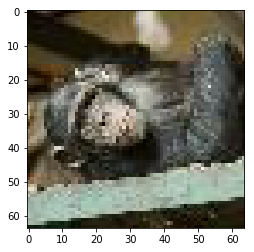

In [16]:
from random import randint
randomSample = randint(0,trainingDataset.__len__())
img, label = trainingDataset.__getitem__(randomSample)
print ("Label : " + str(label[0]))
print ("Class : " + str(trainingDataset.classes[int(label)]))
print (img.shape)
plt.imshow(img)
plt.show()